In [51]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from PROMETHEE import PROMETHEE_2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
centers_ = [(2, 2, 2, 2, 2), (5, 5, 5, 5, 5), (10, 10, 10, 10, 10)]

X, y = make_blobs(n_samples=[1, 8, 6], centers=centers_, n_features=5, cluster_std= [0.5, 2, 2], random_state=0)

In [63]:
X

array([[ 3.04544424,  6.90017684,  4.69728558,  4.7935623 ,  5.821197  ],
       [ 5.31269794,  7.46058136,  7.4047597 ,  4.22534637,  4.3953945 ],
       [-0.10597963,  6.30723719,  6.7288724 ,  3.51566996,  9.53950925],
       [10.85666374, 10.13303444, 10.6049438 ,  8.73135581,  9.27451767],
       [ 5.28808714,  7.90854701,  6.52207545,  5.24335003,  5.88772647],
       [11.45818112, 10.25796582, 12.27880137,  7.53034836, 10.80468328],
       [ 9.19643813,  6.73960331, 10.92556451,  8.18540327, 10.10389079],
       [ 2.09126865,  5.09151703,  4.6256323 ,  8.06555843,  7.93871754],
       [ 9.1238514 ,  7.49440928, 11.55498071,  6.7722043 ,  9.57451944],
       [ 2.90289407,  2.15996413,  1.58745962,  8.90155079,  3.98069564],
       [ 8.6550791 ,  9.28089368,  8.37370744,  6.5474348 , 10.35485228],
       [ 8.20906688, 10.773805  ,  8.97838972,  7.63873563,  9.94363554],
       [ 5.66734865,  7.98815815,  4.58968347,  5.6261354 ,  3.29180852],
       [ 5.30989485,  5.75632504,  3.2

In [64]:
m, n = X.shape

n_simulations = 300

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (1,2, n)
    P [:,s] = np.random.uniform (5, 8, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

In [65]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.061858,-0.222166
a_2,0.081110,-0.137450
a_3,0.155674,-0.159165
a_4,0.052691,0.434477
a_5,0.047158,-0.080800
a_6,0.076790,0.477023
a_7,0.083905,0.332796
a_8,0.122602,-0.123534
a_9,0.085610,0.317194
a_10,0.170852,-0.372405


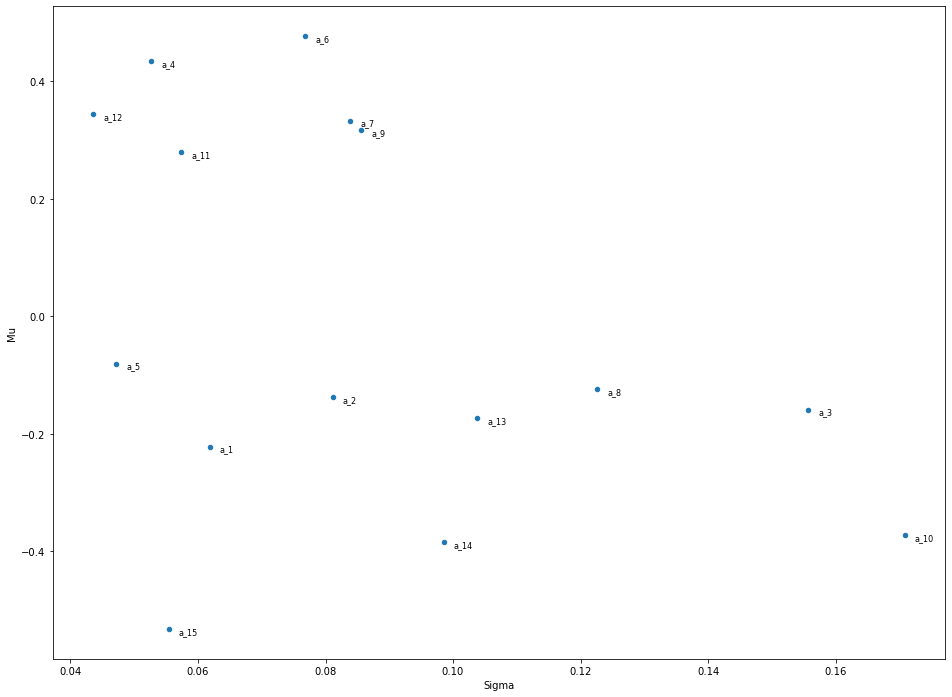

In [66]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (16,12))
for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='black')
for k, v in Sigma_Mu_df.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [67]:
df =Sigma_Mu_df.copy()

In [68]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_4', 'a_6', 'a_12']
PKF_2: ['a_5', 'a_7', 'a_11']
PKF_3: ['a_1', 'a_2', 'a_9', 'a_15']
PKF_4: ['a_8', 'a_13', 'a_14']
PKF_5: ['a_3']
PKF_6: ['a_10']


In [69]:
from PROMETHEE import optimize_PROM2_original, optimize_newconstraint

m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 2, fronteira 6: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 3, fronteira 6: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 4, fronteira 6: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 

In [70]:
global_ef = np.sum(local_ef, axis = 1)
results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index).sort_values("Global Efficiency", ascending = False)
results = results.assign(Position = [i+1 for i in range(results.shape[0])])
results

,Global Efficiency,Position
a_6,2.390229,1
a_4,2.177502,2
a_12,1.759882,3
a_7,1.631405,4
a_9,1.559675,5
a_11,1.506121,6
a_5,0.483034,7
a_1,0.250780,8
a_2,0.249439,9
a_15,0.238884,10
